In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
train_path =  'C:/Users/47864/Desktop/ml-100k/ml-100k/u1.base'
test_path = 'C:/Users/47864/Desktop/ml-100k/ml-100k/u1.test'
train = np.loadtxt(train_path)
test = np.loadtxt(test_path)
R = np.zeros((943,1682))
for sample in train:
    R[int(sample[0])-1][int(sample[1])-1] = int(sample[2]) #the sparse user score matrix

In [3]:
def compute_loss(user_w,movie_w,dataset):
    sum_loss = 0
    for sample in dataset:
        pred_rate = np.dot(user_w[int(sample[0]),:],movie_w[:,int(sample[1])])
        sum_loss += 1/2*(pred_rate-sample[2])**2
    return sum_loss/len(dataset)

In [4]:
def compute_gradient(user_w,movie_w,learning_rate):
    user_gradient = np.zeros(user_w.shape)
    movie_gradient = np.zeros(movie_w.shape)
    for row in range(user_w.shape[0]):
        col = int(random.choice(train[train[:,0]== (row+1)])[1])-1
        user_gradient[row] = -movie_w.T[col]*(R[row][col] -np.dot(user_w[row],movie_w.T[col]))
    
    for col in range(movie_w.shape[1]):
        try:
            row = int(random.choice(train[train[:,1]== (col+1)])[0])-1
        except:
            pass
        movie_gradient[:,col] = -user_w[row]*(R[row][col] - np.dot(user_w[row],movie_w.T[col]))
    user_w -= learning_rate*user_gradient
    movie_w -= learning_rate*movie_gradient
    return user_w,movie_w

In [5]:
def train_model(user_w,movie_w,iteration,learning_rate):
    loss_list = []
    loss = compute_loss(user_w,movie_w,test)
    loss_list.append(loss)
    print(loss)
    for i in range(iteration-1):
        user_w, moive_w = compute_gradient(user_w,movie_w,learning_rate)
        loss = compute_loss(user_w,movie_w,test)
        loss_list.append(loss)
        print(i, loss)
    return loss_list

8.87006959873
0 8.7875290316
1 8.72020526854
2 8.65307787388
3 8.57495343754
4 8.51832748528
5 8.45894246647
6 8.3947970548
7 8.35186076149
8 8.31064400346
9 8.26976637977
10 8.23517590547
11 8.19714479536
12 8.15639772059
13 8.12501484641
14 8.09488995786
15 8.06471359879
16 8.03463710786
17 8.00296944788
18 7.98023674521
19 7.94668906035
20 7.91917976812
21 7.89148784807
22 7.85884105631
23 7.83536126856
24 7.80924303095
25 7.78808412072
26 7.76851628481
27 7.75213750044
28 7.73103862911
29 7.7137254972
30 7.69045239628
31 7.6706197391
32 7.65690397874
33 7.63531489419
34 7.61739849538
35 7.59527594591
36 7.57338726356
37 7.55728806992
38 7.54291248461
39 7.52979465933
40 7.50716612893
41 7.48752229257
42 7.4760689122
43 7.457004332
44 7.44001661663
45 7.42773984108
46 7.41356568168
47 7.39706595862
48 7.38086478156
49 7.36218360589
50 7.34436822155
51 7.32677436449
52 7.30234718167
53 7.27438254212
54 7.255445912
55 7.24071639148
56 7.22028373772
57 7.19798454666
58 7.17672835554
59

464 1.00322825288
465 1.00288720321
466 1.00439089847
467 1.0049887962
468 1.00412013309
469 1.00417746079
470 1.00215049848
471 1.00232621645
472 1.00073097709
473 1.00147851645
474 1.00192612479
475 1.00009957321
476 1.00009336335
477 1.00281525619
478 1.00047433859
479 1.00145995724
480 1.00148509347
481 1.00106592332
482 1.00157978172
483 0.999018941206
484 0.998495271901
485 1.00087271727
486 1.00130614574
487 1.00294927811
488 1.00188228873
489 1.00212371853
490 0.999952326002
491 1.00312570803
492 1.00232934604
493 1.00147008079
494 1.00459359142
495 1.0039410436
496 1.0033172778
497 1.00514287247
498 1.00239508398
499 1.00087576723
500 1.00021389601
501 0.997394711256
502 0.995309930661
503 0.997011787482
504 0.995396505962
505 0.994419726082
506 0.99291013012
507 0.991342893995
508 0.992390105557
509 0.990359326767
510 0.992611491408
511 0.992586576139
512 0.992865402384
513 0.993538759052
514 0.99127974354
515 0.992045070406
516 0.989803316715
517 0.988651920659
518 0.9908909

905 0.995624744775
906 0.99611228563
907 0.993220338719
908 0.991719937311
909 0.993747985212
910 0.993532134499
911 0.995669132171
912 0.996638659689
913 0.997147836877
914 0.995852811702
915 0.996016388373
916 0.99666145381
917 0.997297113771
918 0.99848337617
919 1.00011529024
920 0.999021010709
921 0.999628527721
922 1.00000086762
923 0.999802692638
924 1.00051264741
925 1.00177259815
926 1.00056646044
927 1.00020344412
928 1.00086125424
929 1.00174473116
930 0.998017296128
931 0.999058264748
932 0.999980355169
933 0.998158168036
934 0.999870212286
935 1.00056165536
936 1.00257599267
937 1.0008653784
938 0.998450017443
939 0.998772267476
940 0.998164683012
941 0.99922615811
942 0.99539270863
943 0.995483276144
944 0.996339359161
945 0.996712892074
946 0.998819007477
947 1.00079976721
948 1.00328587853
949 1.00335253402
950 1.00260325617
951 1.00304832263
952 1.00100006247
953 1.00123629738
954 1.00025811942
955 0.999890471487
956 0.997843045172
957 1.00007827923
958 0.998664164703


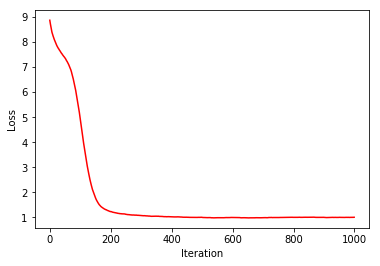

In [6]:
if __name__ == '__main__':
    user_w = np.random.randn(943,4)
    movie_w = np.random.randn(4,1682)
    iteration = 1000
    learning_rate = 0.01
    loss_list = train_model(user_w,movie_w,iteration,learning_rate)
    plt.plot(range(iteration),loss_list,color = 'r')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()